### Данные и общая информация

# Описание

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 
Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (Xbox, PlayStation и т.д.). Данные до 2016 года. 

# План:
1. Подготовка данных:
    - Замена названия столбцов (к нижнему регистру);
    - Преобразование данных в нужные типы;
    - Обработка пропусков при необходимости;
    - Расчет суммарных продаж во всех регионах и запись их в отдельный столбец.
2. Исследовательский анализ данных:
    - Сколько игр выпускалось в разные годы;
    - Как менялись продажи по платформам;
    - Выбор актуального  периода;
    - Какие платформы лидируют по продажам, растут или падают;
    - График «ящик с усами» по глобальным продажам игр в разбивке по платформам;
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    - Общее распределение игр по жанрам. 
    
3. Составление портрета пользователя каждого региона:
    - Определить для пользователя каждого региона (NA, EU, JP):
        - Самые популярные платформы (топ-5);
        - Самые популярные жанры (топ-5).
        - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
5. Выводы

#### Данные

In [316]:
import pandas as pd
import seaborn as sb

In [317]:
data = pd.read_csv('/datasets/games.csv')

#### Вывод 5 строк

In [318]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Общая информация о таблице

In [319]:
#Информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных

#### Замена названия столбцов (приведим к нижнему регистру)

In [320]:
data = data.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

#### Преобразование данных в нужные типы.

In [321]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [322]:
# замена tbd на nan, nan отсавим без именений
data['user_score'] = data['user_score'].replace('tbd','nan')
# заменим тип данных в столбце 'user_score'
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')


#### Обработка пропусков.

In [323]:
# удалим пропуски в столбцах 'year_of_release', 'genre'
data = data.dropna(subset=['year_of_release', 'genre'])

In [326]:
#пропуски в столбце rating заполним заглушкой unknown
data['rating']=data['rating'].fillna(value='unknown')

In [327]:
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

#### Cуммарные продажи во всех регионах.

In [328]:
#  Создадим столбец с суммарным количеством продаж по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


#### Промежуточный вывод:

В процессе подготовки данных было сделано:
- Привели столбцы к нижнему регистру;
- Произвели преобразование данных в столбце 'user_score' к числовому;
- Посчитали суммарные продажи во всех регионах и записали в отдельный столбец.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

##### Сгрупируем данные по столбцу год.

In [330]:
data_groupby_year = data.groupby('year_of_release')['year_of_release'].count()
print(data_groupby_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


##### Построим график для наглядности

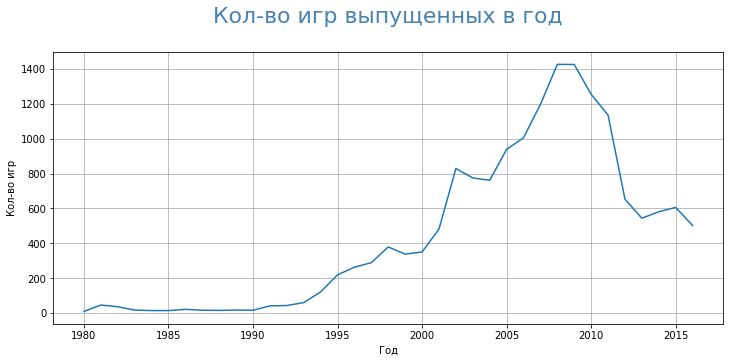

In [331]:
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, xlabel= 'Год',  ylabel = 'Кол-во игр', legend= False, figsize=(12, 5))
    .set_title('Кол-во игр выпущенных в год' + "\n", fontsize = 22, color = 'SteelBlue')
);

Из графика видно, что
- до 1990 года объем выпускаемых игр был малым,
- в дальнешем анализе этимим данными можно либо пренебречь.

#### Зависимость продаж по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [332]:
# Сгруппируем данные для каждой платформы по суммарным продажам и выберем топ платформ.
print(data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
Name: total_sales, dtype: float64


Топ платформ по продажам - это первые 6 платформ.

In [333]:
# соберем сводную таблтцу по названию  платформы и расчитаем общие продажи
platform_name_stаt = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
# переименуем названия столбцов
platform_name_stаt.columns = ['sales']
# оставим только 6 платформ с самыми большими продажами
platform_name_stаt = platform_name_stаt.sort_values(by='sales',ascending=False).head(6)
# выведем на экран таблтцу
display(platform_name_stаt)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


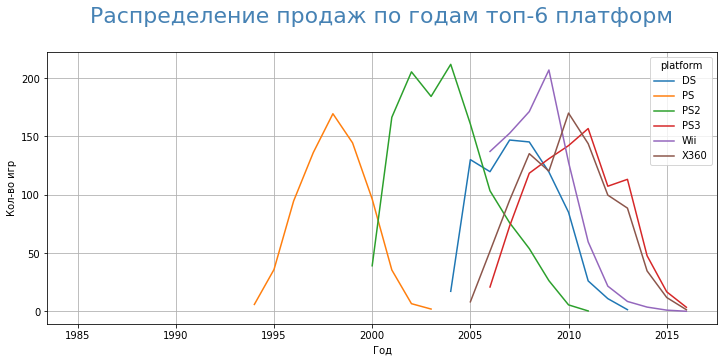

In [334]:
(
    data
    .query('platform in @platform_name_stаt.index')
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, xlabel='Год',ylabel='Кол-во игр', figsize=(12, 5))
    .set_title('Распределение продаж по годам топ-6 платформ' + "\n", fontsize = 22, color = 'SteelBlue')
);

Из приведенных выше графиков видно, что срок жизни платформы составляет в среднем не более 10 лет.

#### Выбор данных за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

В качестве актуального периода выберем диапозон с 2013 года до 2016. Для этого периода характерно:
- появляются новые платформы, которые могут представлять интерес в будущем,
- верхнее ограничение берем поскольку данные за 2016 год на данном этапе могут быть не полными,
- нет платформы, которые уже заканчивают свою "жизнь" в данном периоде.

In [335]:
# актцальные данные которые будем использовать при дальнейшем анализе.
actual_data = data.query('year_of_release>2012')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

##### Определим Топ-5 прибыльных платформ за последнии 4 года.

In [336]:
# соберем сводную таблицу по названию платформы и расчитаем общие продажи
actual_data_stat = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
# переименуем названия столбцов
actual_data_stat.columns = ['sales']
# оставим только 5 платформ с самыми большими продажами
actual_data_stat = actual_data_stat.sort_values(by='sales',ascending=False).head(5)
# выведем на экран таблицу
display(actual_data_stat)

,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Из приведенной выше таблицы видно, что лидерами являются первые 5 платформ.

### График распределения продаж с 2012 года за  4 года для топ-5 платформ.

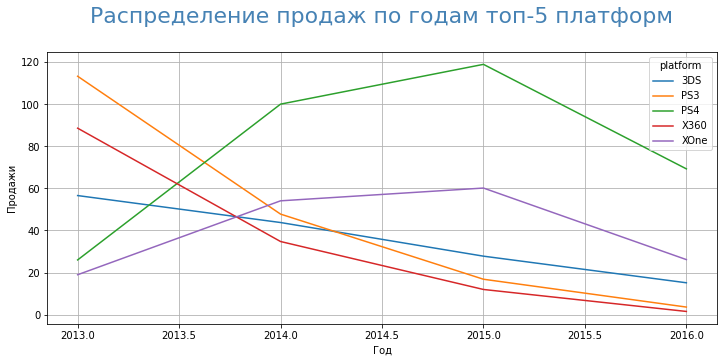

In [337]:
(
    actual_data
    .query('platform in @actual_data_stat.index')
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, xlabel='Год',ylabel='Продажи', figsize=(12, 5))
    .set_title('Распределение продаж по годам топ-5 платформ' + "\n", fontsize = 22, color = 'SteelBlue')
);

##### Промежуточный вывод:
- За последнии 4 года появилось 2 новые платофрмы: PS4 и XONE;
- Эти две платформы показали рост продаж;
- Поскольку срок жизни платформы составляет не более 10 лет, наиболее интерсными и прибыльными могут оказаться платформы PS4 и XONE, поскольку они показывали рост в период с 2013 по 2015 год.
- объем продаж приходящийся на две новые платофрмы существенно больше, чем объем продаж на остальные 3 платформы.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [338]:
import matplotlib.pyplot as plt

##### Ящик с усами для платформ c учетом выбросов.

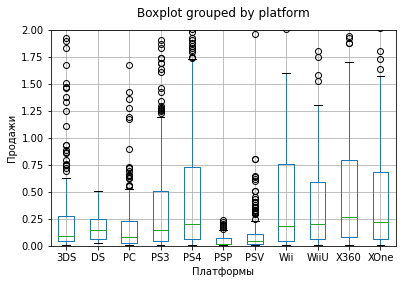

In [339]:
actual_data.boxplot(column='total_sales', by='platform', showfliers=True)
plt.title('')
plt.ylim(0, 2)
plt.ylabel('Продажи')
plt.xlabel('Платформы');

##### Ящик с усами для платформ без учтеа выбросов.

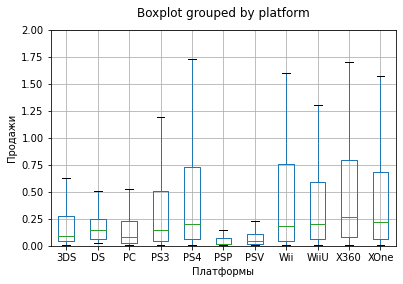

In [340]:
actual_data.boxplot(column='total_sales', by='platform', showfliers=False)
plt.title('')
plt.ylim(0, 2)
plt.ylabel('Продажи')
plt.xlabel('Платформы');

In [342]:
# удалим выбросы
actual_data =  actual_data[actual_data['total_sales']<2]

Из полученного графика видно, что:
- продажи лежат в пределах диапозона до 2,
- медианы лежат в диапозоне до 0,5.

#### Диаграмма рассения и корреляция между отзывами и продажами. 

##### Платформы XOne.

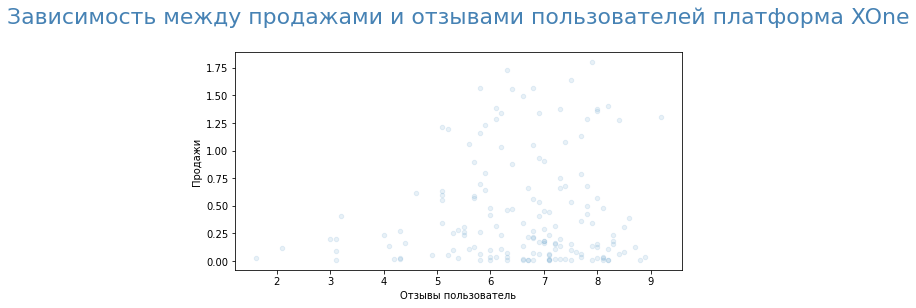

In [343]:
(
    actual_data
    .query('platform == "XOne"')
    .plot(x='user_score',
          y='total_sales',
          kind='scatter',
          figsize=(8,4),
          alpha=0.1,
          xlabel='Отзывы пользователь',
          ylabel='Продажи',
          legend=False)
    .set_title('Зависимость между продажами и отзывами пользователей платформа XOne' + "\n", fontsize = 22, color = 'SteelBlue')
);

In [344]:
#Найдем коэффициент корреляции
print(actual_data.query('platform == "XOne"')['user_score'].corr(data['total_sales']))

0.07989048879133732


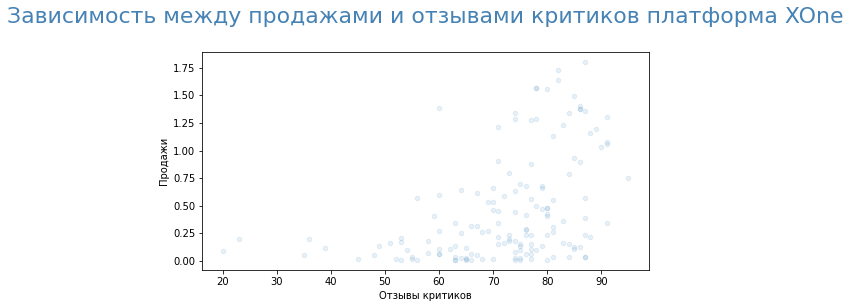

In [345]:
(
    actual_data
    .query('platform == "XOne"')
    .plot(x='critic_score',
          y='total_sales',
          kind='scatter',
          figsize=(8,4),
          alpha=0.1,
          xlabel='Отзывы критиков',
          ylabel='Продажи',
          legend=False)
    .set_title('Зависимость между продажами и отзывами критиков платформа XOne' + "\n", fontsize = 22, color = 'SteelBlue')
);

In [346]:
#Найдем коэффициент корреляции
print(actual_data.query('platform == "XOne"')['critic_score'].corr(data['total_sales']))

0.43369651269944526


Промежуточный вывод: продажи не зависят от мнения пользователей, но имеется средняя зависимость от мнения критиков.

##### Платформы  PS4.

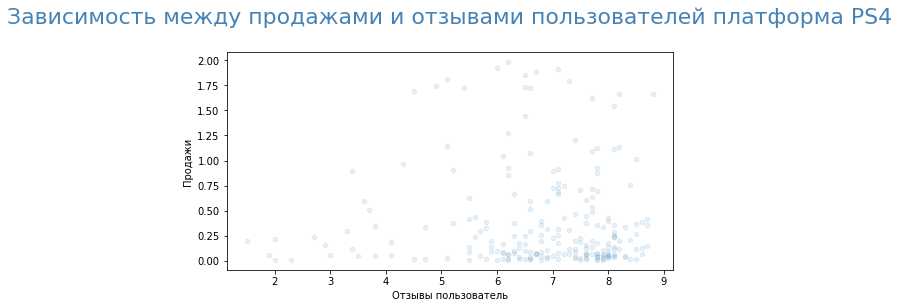

In [347]:
(
    actual_data
    .query('platform == "PS4"')
    .plot(x='user_score',
          y='total_sales',
          kind='scatter',
          figsize=(8,4),
          alpha=0.1,
          xlabel='Отзывы пользователь',
          ylabel='Продажи',
          legend=False)
    .set_title('Зависимость между продажами и отзывами пользователей платформа PS4' + "\n", fontsize = 22, color = 'SteelBlue')
);

In [348]:
#Найдем коэффициент корреляции
print(actual_data.query('platform == "PS4"')['user_score'].corr(data['total_sales']))

-0.013177580196306398


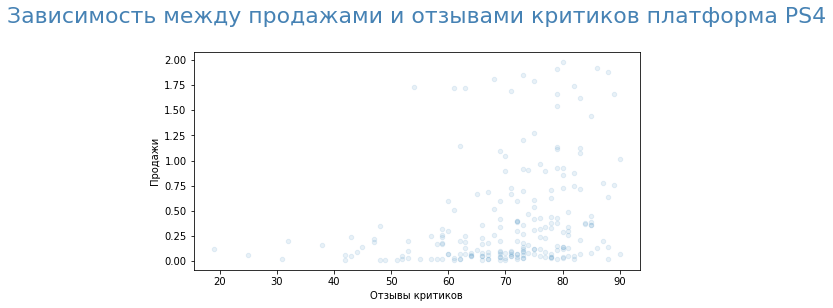

In [349]:
(
    actual_data
    .query('platform == "PS4"')
    .plot(x='critic_score',
          y='total_sales',
          kind='scatter',
          figsize=(8,4),
          alpha=0.1,
          xlabel='Отзывы критиков',
          ylabel='Продажи',
          legend=False)
    .set_title('Зависимость между продажами и отзывами критиков платформа PS4' + "\n", fontsize = 22, color = 'SteelBlue')
);

In [350]:
#Найдем коэффициент корреляции
print(actual_data.query('platform == "PS4"')['critic_score'].corr(data['total_sales']))

0.2943676743921166


Промежуточный вывод: продажи на платформе PS4 не зависят от мнения пользователей, но имеется средняя зависимость от мнения критиков.

#### Соотнесите выводы с продажами игр на других платформах.

##### Сравним уровень кореляции проджа на других платформах с меннием критиков

In [351]:
print('Коэффциенты корреляции между продажамими и оценками критиков:')
print(actual_data.query('platform == "PS4"')['critic_score'].corr(data['total_sales']))
print(actual_data.query('platform == "PS3"')['critic_score'].corr(data['total_sales']))
print(actual_data.query('platform == "3DS"')['critic_score'].corr(data['total_sales']))
print(actual_data.query('platform == "X360"')['critic_score'].corr(data['total_sales']))
print(actual_data.query('platform == "XOne"')['critic_score'].corr(data['total_sales']))


Коэффциенты корреляции между продажамими и оценками критиков:
0.2943676743921166
0.46635646945577286
0.18069228080399052
0.4912768032145573
0.43369651269944526


##### Сравним уровень кореляции продаж на других платформах с мнением пользователей

In [352]:
print('Коэффциенты корреляции между продажамими и оценками пользователей:')
print(actual_data.query('platform == "PS4"')['user_score'].corr(data['total_sales']))
print(actual_data.query('platform == "PS3"')['user_score'].corr(data['total_sales']))
print(actual_data.query('platform == "3DS"')['user_score'].corr(data['total_sales']))
print(actual_data.query('platform == "X360"')['user_score'].corr(data['total_sales']))
print(actual_data.query('platform == "XOne"')['user_score'].corr(data['total_sales']))

Коэффциенты корреляции между продажамими и оценками пользователей:
-0.013177580196306398
0.03260488672647325
0.08701169155707066
0.0713851230747753
0.07989048879133732


Промежуточный вывод:
- имеется средняя зависимость продаж от мнения критиков на всех потенциальных платформах,
- мнение пользователей не влияет на продажи на всех платформах кроме 3DS,
- на платформе 3DS есть слабая зависимость от мения пользователей на уровень продаж.

#### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для того, чтобы найти жанр, где игры стабильно приносят высокий доход -рассмотреть медианные продажи по каждому жанру.

In [353]:
# соберем сводную таблицу по жанрам и расчитаем общие продажи
genre_stаt = actual_data.pivot_table(index=['genre'], values='total_sales', aggfunc='median')
# переименуем названия столбцов
genre_stаt.columns = ['total_sales']
# выведем на экран таблицу
display(genre_stаt.sort_values(by='total_sales',ascending=False))

,total_sales
genre,
Shooter,0.335
Platform,0.185
Sports,0.175
Fighting,0.120
Role-Playing,0.120
Action,0.100
Racing,0.100
Misc,0.090
Simulation,0.090


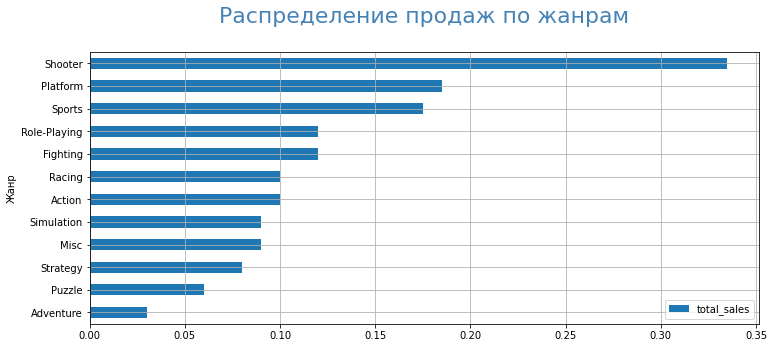

In [354]:
# Построим график продаж по жанрам
(
    genre_stаt
    .sort_values(by='total_sales',ascending=True)
    .plot(kind='barh', grid=True, xlabel='Жанр',figsize=(12, 5))
    .set_title('Распределение продаж по жанрам' + "\n", fontsize = 22, color = 'SteelBlue')
);

Промежуточный вывод:
- самые прибыльные жанры - Shooter и Sports,
- самые низкие продажи - Adventure и Puzzle.

### Составление портрета пользователя

Определите для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Общее количество продаж

In [355]:
# общее число продаж для региона 'na_sales'
actual_data_na_sales_total = actual_data['na_sales'].sum()
print('Общее число продаж для региона NA', actual_data_na_sales_total)
# общее число продаж для региона 'eu_sales'
actual_data_eu_sales_total = actual_data['eu_sales'].sum()
print('Общее число продаж для региона EU', actual_data_eu_sales_total)
# общее число продаж для региона 'jp_sales'
actual_data_jp_sales_total = actual_data['jp_sales'].sum()
print('Общее число продаж для региона JP', actual_data_jp_sales_total)

Общее число продаж для региона NA 220.01
Общее число продаж для региона EU 191.23
Общее число продаж для региона JP 90.29


##### Регион NA

In [356]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_na_sales = actual_data.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
# оставим только 5 платформ с самыми большими продажами
actual_data_na_sales = actual_data_na_sales.sort_values(by='na_sales',ascending=False)
# добавим столбец с долей от общего числа продаж 
actual_data_na_sales['ratio'] = actual_data_na_sales['na_sales'] / actual_data_na_sales_total
# выведем на экран таблтцу
display(actual_data_na_sales.head(5))

,na_sales,ratio
platform,,
XOne,46.99,0.213581
X360,43.95,0.199764
PS4,42.26,0.192082
PS3,36.92,0.167811
WiiU,17.38,0.078996


##### Регион EU

In [357]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_eu_sales = actual_data.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
# оставим только 5 платформ с самыми большими продажами
actual_data_eu_sales = actual_data_eu_sales.sort_values(by='eu_sales',ascending=False)
# добавим столбец с долей от общего числа продаж 
actual_data_eu_sales['ratio'] = actual_data_eu_sales['eu_sales'] / actual_data_eu_sales_total
# выведем на экран таблицу
display(actual_data_eu_sales.head(5))

,eu_sales,ratio
platform,,
PS4,51.11,0.267270
PS3,31.74,0.165978
XOne,26.32,0.137635
PC,23.54,0.123098
X360,23.03,0.120431


##### Регион JP

In [358]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_jp_sales = actual_data.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
# оставим только 5 платформ с самыми большими продажами
actual_data_jp_sales = actual_data_jp_sales.sort_values(by='jp_sales',ascending=False)
# добавим столбец с долей от общего числа продаж 
actual_data_jp_sales['ratio'] = actual_data_jp_sales['jp_sales'] / actual_data_jp_sales_total
# выведем на экран таблтцу
display(actual_data_jp_sales.head(5))

,jp_sales,ratio
platform,,
3DS,31.54,0.349319
PS3,20.36,0.225496
PSV,18.59,0.205892
PS4,10.45,0.115738
WiiU,5.48,0.060693


##### Графики распрелделения продаж по платформам в заивсимости от региона

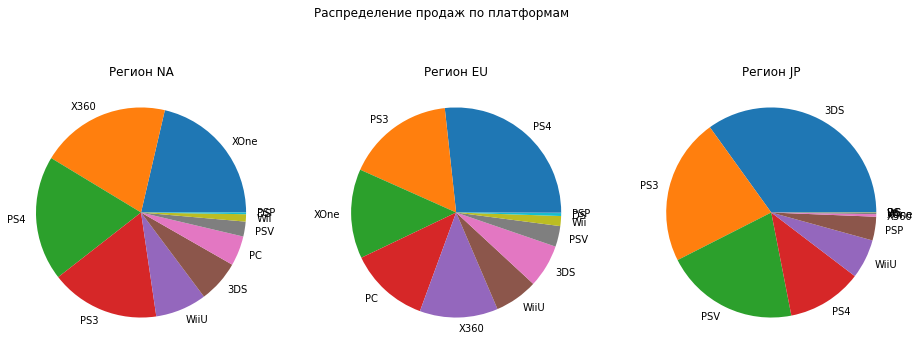

In [359]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.pie(actual_data_na_sales['ratio'], labels = actual_data_na_sales.index)
plt.title('Регион NA')

plt.subplot(1, 3, 2)
plt.pie(actual_data_eu_sales['ratio'], labels = actual_data_eu_sales.index)
plt.title('Регион EU')

plt.subplot(1, 3, 3)
plt.pie(actual_data_jp_sales['ratio'], labels = actual_data_jp_sales.index)
plt.title('Регион JP')

plt.suptitle('Распределение продаж по платформам')
plt.show()

Промежуточный вывод:
- на рынках EA и NA очень похожее распределение популярности платформа. Лидирует PS4.
- для JP совсем другое распределение платформ. Лидирующее место занимает платформа 3DS. А такие платформы как XOne и X360 вообще непользуются популярностью.

#### Самые популярные жанры (топ-5). Поясните разницу.

Разница между платформой и жанром заключается в том, что на одной платформе может быть разное количество игр в определенном жанре. Наличие определенных жанров на конкретных платформах, может определять популярность платформы.

##### Регион NA

In [360]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_na_genre = actual_data.pivot_table(index=['genre'], values=['na_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_na_genre.columns =['sales']
# оставим только 5 платформ с самыми большими продажами
actual_data_na_genre = actual_data_na_genre.sort_values(by='sales',ascending=False).head(5)
# добавим столбец с долей от общего числа продаж 
actual_data_na_genre['ratio'] = actual_data_na_genre['sales'] / actual_data_na_sales_total
# выведем на экран таблицу
display(actual_data_na_genre)

,sales,ratio
genre,,
Action,68.53,0.311486
Sports,37.52,0.170538
Shooter,33.85,0.153857
Role-Playing,25.09,0.114040
Misc,13.80,0.062724


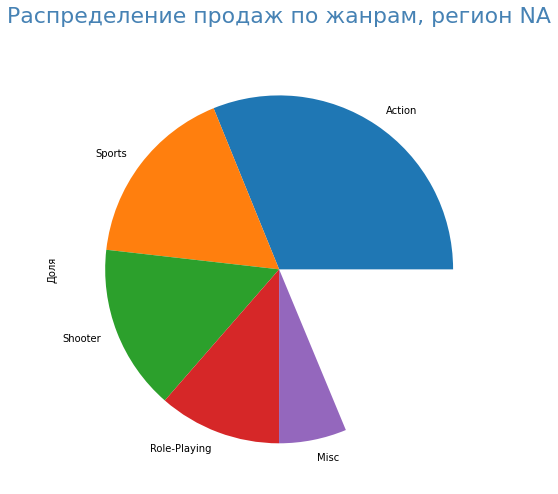

In [361]:
actual_data_na_genre.plot(
    kind='pie',
    y='ratio',
    ylabel = 'Доля',
    normalize=False,
    figsize=(8, 8),
    legend = False
).set_title('Распределение продаж по жанрам, регион NA' + "\n", fontsize = 22, color = 'SteelBlue');

In [362]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_eu_genre = actual_data.pivot_table(index=['genre'], values=['eu_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_eu_genre.columns =['sales']
# оставим только 5 платформ с самыми большими продажами
actual_data_eu_genre = actual_data_eu_genre.sort_values(by='sales',ascending=False).head(5)
# добавим столбец с долей от общего числа продаж 
actual_data_eu_genre['ratio'] = actual_data_eu_genre['sales'] / round(actual_data_eu_sales_total)
# выведем на экран таблтцу
display(actual_data_eu_genre)

,sales,ratio
genre,,
Action,63.17,0.330733
Shooter,29.50,0.154450
Sports,20.37,0.106649
Role-Playing,18.73,0.098063
Racing,12.70,0.066492


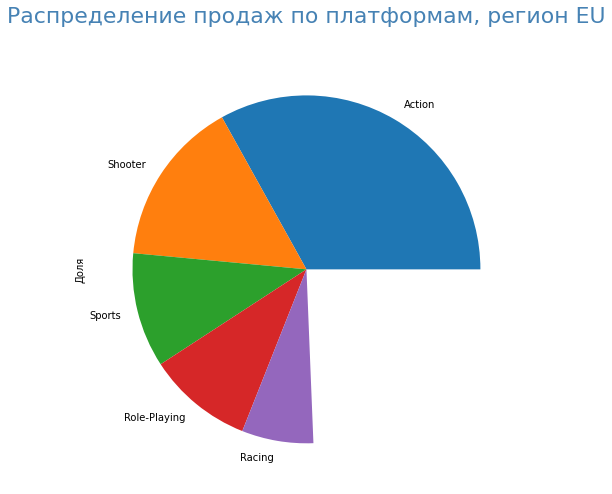

In [363]:
actual_data_eu_genre.plot(
    kind='pie',
    y='ratio',
    ylabel = 'Доля',
    normalize=False,
    figsize=(8, 8),
    legend = False
).set_title('Распределение продаж по платформам, регион EU' + "\n", fontsize = 22, color = 'SteelBlue');

In [364]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_jp_genre = actual_data.pivot_table(index=['genre'], values=['jp_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_jp_genre.columns =['sales']
# оставим только 5 платформ с самыми большими продажами
actual_data_jp_genre = actual_data_jp_genre.sort_values(by='sales',ascending=False).head(5)
# добавим столбец с долей от общего числа продаж 
actual_data_jp_genre['ratio'] = actual_data_jp_genre['sales'] / round(actual_data['jp_sales'].sum())
# выведем на экран таблтцу
display(actual_data_jp_genre)

,sales,ratio
genre,,
Action,29.75,0.330556
Role-Playing,27.06,0.300667
Misc,9.04,0.100444
Adventure,5.82,0.064667
Sports,4.86,0.054000


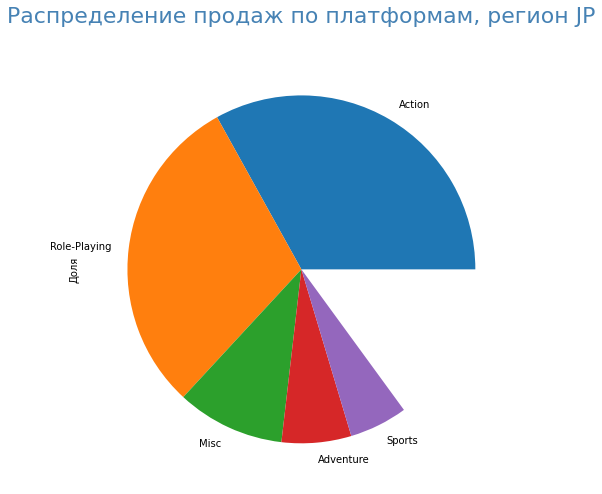

In [365]:
actual_data_jp_genre.plot(
    kind='pie',
    y='ratio',
    ylabel = 'Доля',
    normalize=False,
    figsize=(8, 8),
    legend = False
).set_title('Распределение продаж по платформам, регион JP' + "\n", fontsize = 22, color = 'SteelBlue');

Промежуточный вывод:
- на рынках EA и NA очень похожее распределение популярности жанров, отличие только в одно жанре, который занимает 5 место.
- для JP совсем другое распределение жанров, как в качественном, так и в количественном выражении, жанр  Role-Playinf на первом месте.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [366]:
# соберем сводную таблицу по названию платформы и расчитаем общие продажи
actual_data_na_rating = actual_data.pivot_table(index=['rating'], values=['na_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_na_rating.columns =['sales']
# выведем на экран таблтцу
display(actual_data_na_rating.sort_values(by='sales',ascending=False))

,sales
rating,
M,63.53
E,42.05
E10+,41.79
unknown,39.02
T,33.62


In [367]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_eu_rating = actual_data.pivot_table(index=['rating'], values=['eu_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_eu_rating.columns =['sales']
# выведем на экран таблтцу
display(actual_data_eu_rating.sort_values(by='sales',ascending=False))

,sales
rating,
M,55.83
unknown,38.54
E10+,36.37
E,31.94
T,28.55


In [368]:
# соберем сводную таблицу по названию  платформы и расчитаем общие продажи
actual_data_jp_rating = actual_data.pivot_table(index=['rating'], values=['jp_sales'], aggfunc=['sum'])
# переименуем столбцы
actual_data_jp_rating.columns =['sales']
# выведем на экран таблтцу
display(actual_data_jp_rating.sort_values(by='sales',ascending=False))

,sales
rating,
unknown,53.06
T,17.25
E,8.09
M,7.96
E10+,3.93


Промежуточный вывод:
- наличие не заполненого рейтинга сильно влияет на анализ. Видно, что игры с неизвестным рейтингом составляют существенный объем, 
- на рынках EA и NA очень похожие продажи по рейтингу ESRB,
- для JP совсем другое распределение влияния рейтинга ESRB на продажи, как в качественном, так и в количественном выражении.

### Проверка гипотез

In [369]:
from scipy import stats as st

actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 863 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2111 non-null   object 
 1   platform         2111 non-null   object 
 2   year_of_release  2111 non-null   float64
 3   genre            2111 non-null   object 
 4   na_sales         2111 non-null   float64
 5   eu_sales         2111 non-null   float64
 6   jp_sales         2111 non-null   float64
 7   other_sales      2111 non-null   float64
 8   critic_score     903 non-null    float64
 9   user_score       1094 non-null   float64
 10  rating           2111 non-null   object 
 11  total_sales      2111 non-null   float64
dtypes: float64(8), object(4)
memory usage: 214.4+ KB


In [370]:
# удалим строки с пропусками в столбце user_score
actual_data_stat = actual_data.dropna(subset=['user_score'])

actual_data_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 863 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1094 non-null   object 
 1   platform         1094 non-null   object 
 2   year_of_release  1094 non-null   float64
 3   genre            1094 non-null   object 
 4   na_sales         1094 non-null   float64
 5   eu_sales         1094 non-null   float64
 6   jp_sales         1094 non-null   float64
 7   other_sales      1094 non-null   float64
 8   critic_score     888 non-null    float64
 9   user_score       1094 non-null   float64
 10  rating           1094 non-null   object 
 11  total_sales      1094 non-null   float64
dtypes: float64(8), object(4)
memory usage: 111.1+ KB


#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Визуализируем данные

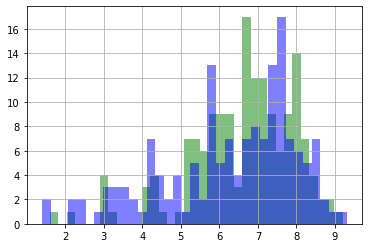

In [371]:
actual_data_stat[actual_data_stat['platform'] =='XOne']['user_score'].hist(bins=35, alpha=0.5, color='green')
actual_data_stat[actual_data_stat['platform'] =='PC']['user_score'].hist(bins=35, alpha=0.5, color='blue');

Сформулируем гипотезы и задами уровень заничмости.

```
H_0: Рейтинги (user_score) пользователей "Xbox One" = Рейтинги (user_score) пользователей "PC"`
H_a: Рейтинги (user_score) пользователей "Xbox One" ≠ Рейтинги (user_score) пользователей "PC"`
alpha = 0.05
```

Поскольку выборки не зависят друг от друга, применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [372]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_data_stat[actual_data_stat['platform'] == 'XOne']['user_score'], 
    actual_data_stat[actual_data_stat['platform'] == 'PC']['user_score'],
    equal_var=False
)
# значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.09105223496250824
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Визуализируем данные

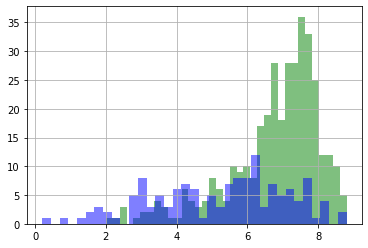

In [373]:
actual_data_stat[actual_data_stat['genre'] =='Action']['user_score'].hist(bins=35, alpha=0.5, color='green')
actual_data_stat[actual_data_stat['genre'] =='Sports']['user_score'].hist(bins=35, alpha=0.5, color='blue');

Сформулируем гипотезы и задами уровень заничмости.

```
H_0: Рейтинги (user_score) жанра "Action" = Рейтинги (user_score) жанра "Sports"`
H_a: Рейтинги (user_score) жанра "Action" ≠ Рейтинги (user_score) жанра "Sports"`
alpha = 0.05
```

Применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

In [374]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_data_stat[actual_data_stat['genre'] =='Action']['user_score'], 
    actual_data_stat[actual_data_stat['genre'] =='Sports']['user_score'],
    equal_var=False
)
# значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.912084898421132e-16
Отвергаем нулевую гипотезу


#### Промежуточный вывод:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Вывод:

В ходе выподнения работы было сделано:
1. Предобработка данных:
- Заменили названия столбцов (привели к нижнему регистру);
- Преобразовали данные в нужные типы.
- Обработали пропуски.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
2. Исследовательский анализ данных:
- Рассмотрели выпуск игр в разные годы. До 1990 года объем выпускаемых игр очень мал.
- Выявлен срок жизни платформы в среднем 10 лет.
- В качестве актуального периода для ислледования был взят период 2013-2016 годы.
- Лидруют платформы XOne и PS4.
- Установлено влияние на продажи мнение критиков. Влияния пользователей на продажи нет.
- На других платформах так же критики оказывают незначиетльено влияние на проджаи.
- Самые прибыльные жанры - Shooter и Sports, и жанры с самыми низкими продажами - Adventure и Puzzle.
3. Портрет пользователя каждого региона:
- Составлен портрет пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) для NA и EU: PS4, PS3, XOne, X360, 3DS.
- Самые популярные платформы (топ-5) для JP: 3DS, PS3, PSV, PS4, WiiU.
- Самые популярные жанры (топ-5) для NA и EU: Action, Shooter, Sports, Role-Playing, Misc.
- Самые популярные жанры (топ-5) для JP: Role-Playing, Action, Misc, Fighting, Shooter.
- Рейтинг ESRB влияет на продажи в регионе JP.
4. Произведена проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.